In [ ]:
!pip install mediapipe
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download mohamedadlyi/aflw2000-3d
!unzip aflw2000-3d.zip
!kaggle datasets download jessicali9530/celeba-dataset
!unzip celeba-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/mohamedadlyi/aflw2000-3d
License(s): apache-2.0
  0% 0.00/83.4M [00:00<?, ?B/s]
100% 83.4M/83.4M [00:00<00:00, 1.15GB/s]
Archive:  aflw2000-3d.zip
  inflating: AFLW2000/Code/DrawSolidHead.m  
  inflating: AFLW2000/Code/DrawTextureHead.m  
  inflating: AFLW2000/Code/Mex/Tnorm_Vnorm.h  
  inflating: AFLW2000/Code/Mex/Tnorm_VnormC.cpp  
  inflating: AFLW2000/Code/Mex/Tnorm_VnormC.mexw64  
  inflating: AFLW2000/Code/Mex/compile.m  
  inflating: AFLW2000/Code/ModelGeneration/ModelGenerate.m  
  inflating: AFLW2000/Code/ModelGeneration/model_info.mat  
  inflating: AFLW2000/Code/Model_Exp.mat  
  inflating: AFLW2000/Code/Model_Shape_Sim.mat  
  inflating: AFLW2000/Code/NormDirection.m  
  inflating: AFLW2000/Code/RotationMatrix.m  
  inflating: AFLW2000/Code/Tnorm_VnormC.mexw64  
  inflating: AFLW2000/Code/main_show_with_BFM.m  
  inflating: AFLW2000/Code/main_show_without_BFM.m  
  inflating: AFLW2000/Code/readme.txt  
  inflating: AFLW2000/image

# 📌 1. Imports & Configurations

In [1]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split

from src.preprocessing import load_aflw2000, preprocess
from src.metrics import calculate_regression_metrics
from src.visualization import plot_regression_results, inference_on_image
from src.models import train_and_select_best
from src.webcam import start_webcam_pose_estimation

# 📌 2. Load and Preprocess AFLW2000 Dataset

In [3]:
dataset_dir = "./dataset/AFLW2000"
X, y = load_aflw2000(dataset_dir)

📂 Found 2000 images in dataset
✅ Dataset prepared: (1853, 5)


# 📌 3. Train-Test Split


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 4. Train Models and Select Best


In [6]:
best_model, best_name = train_and_select_best(X_train, y_train, X_test, y_test)

with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

🚀 SVR_RBF: MSE=0.0156, R²=0.8420
🚀 RandomForest: MSE=0.0272, R²=0.7189
🚀 MLP: MSE=0.0274, R²=0.7346
🚀 XGBoost: MSE=0.0268, R²=0.7375
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.050226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 238170
[LightGBM] [Info] Number of data points in the train set: 1482, number of used features: 934
[LightGBM] [Info] Start training from score -0.097284
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.051153 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 238170
[LightGBM] [Info] Number of data points in the train set: 1482, number of used features: 934
[LightGBM] [Info] Start training from score 0.014219
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.050531 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

c:\Users\ality\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\ality\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\ality\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


🚀 LightGBM: MSE=0.0367, R²=0.6314

🎯 Best model: SVR_RBF (MSE=0.0156)


# 📌 5. Evaluate Best Model


📊 Evaluation Metrics:
MSE: 0.0156
RMSE: 0.1251
MAE: 0.0663
R2: 0.8420
MedAPE: 20.2697
MedSPE: -0.0705
EVS: 0.8430


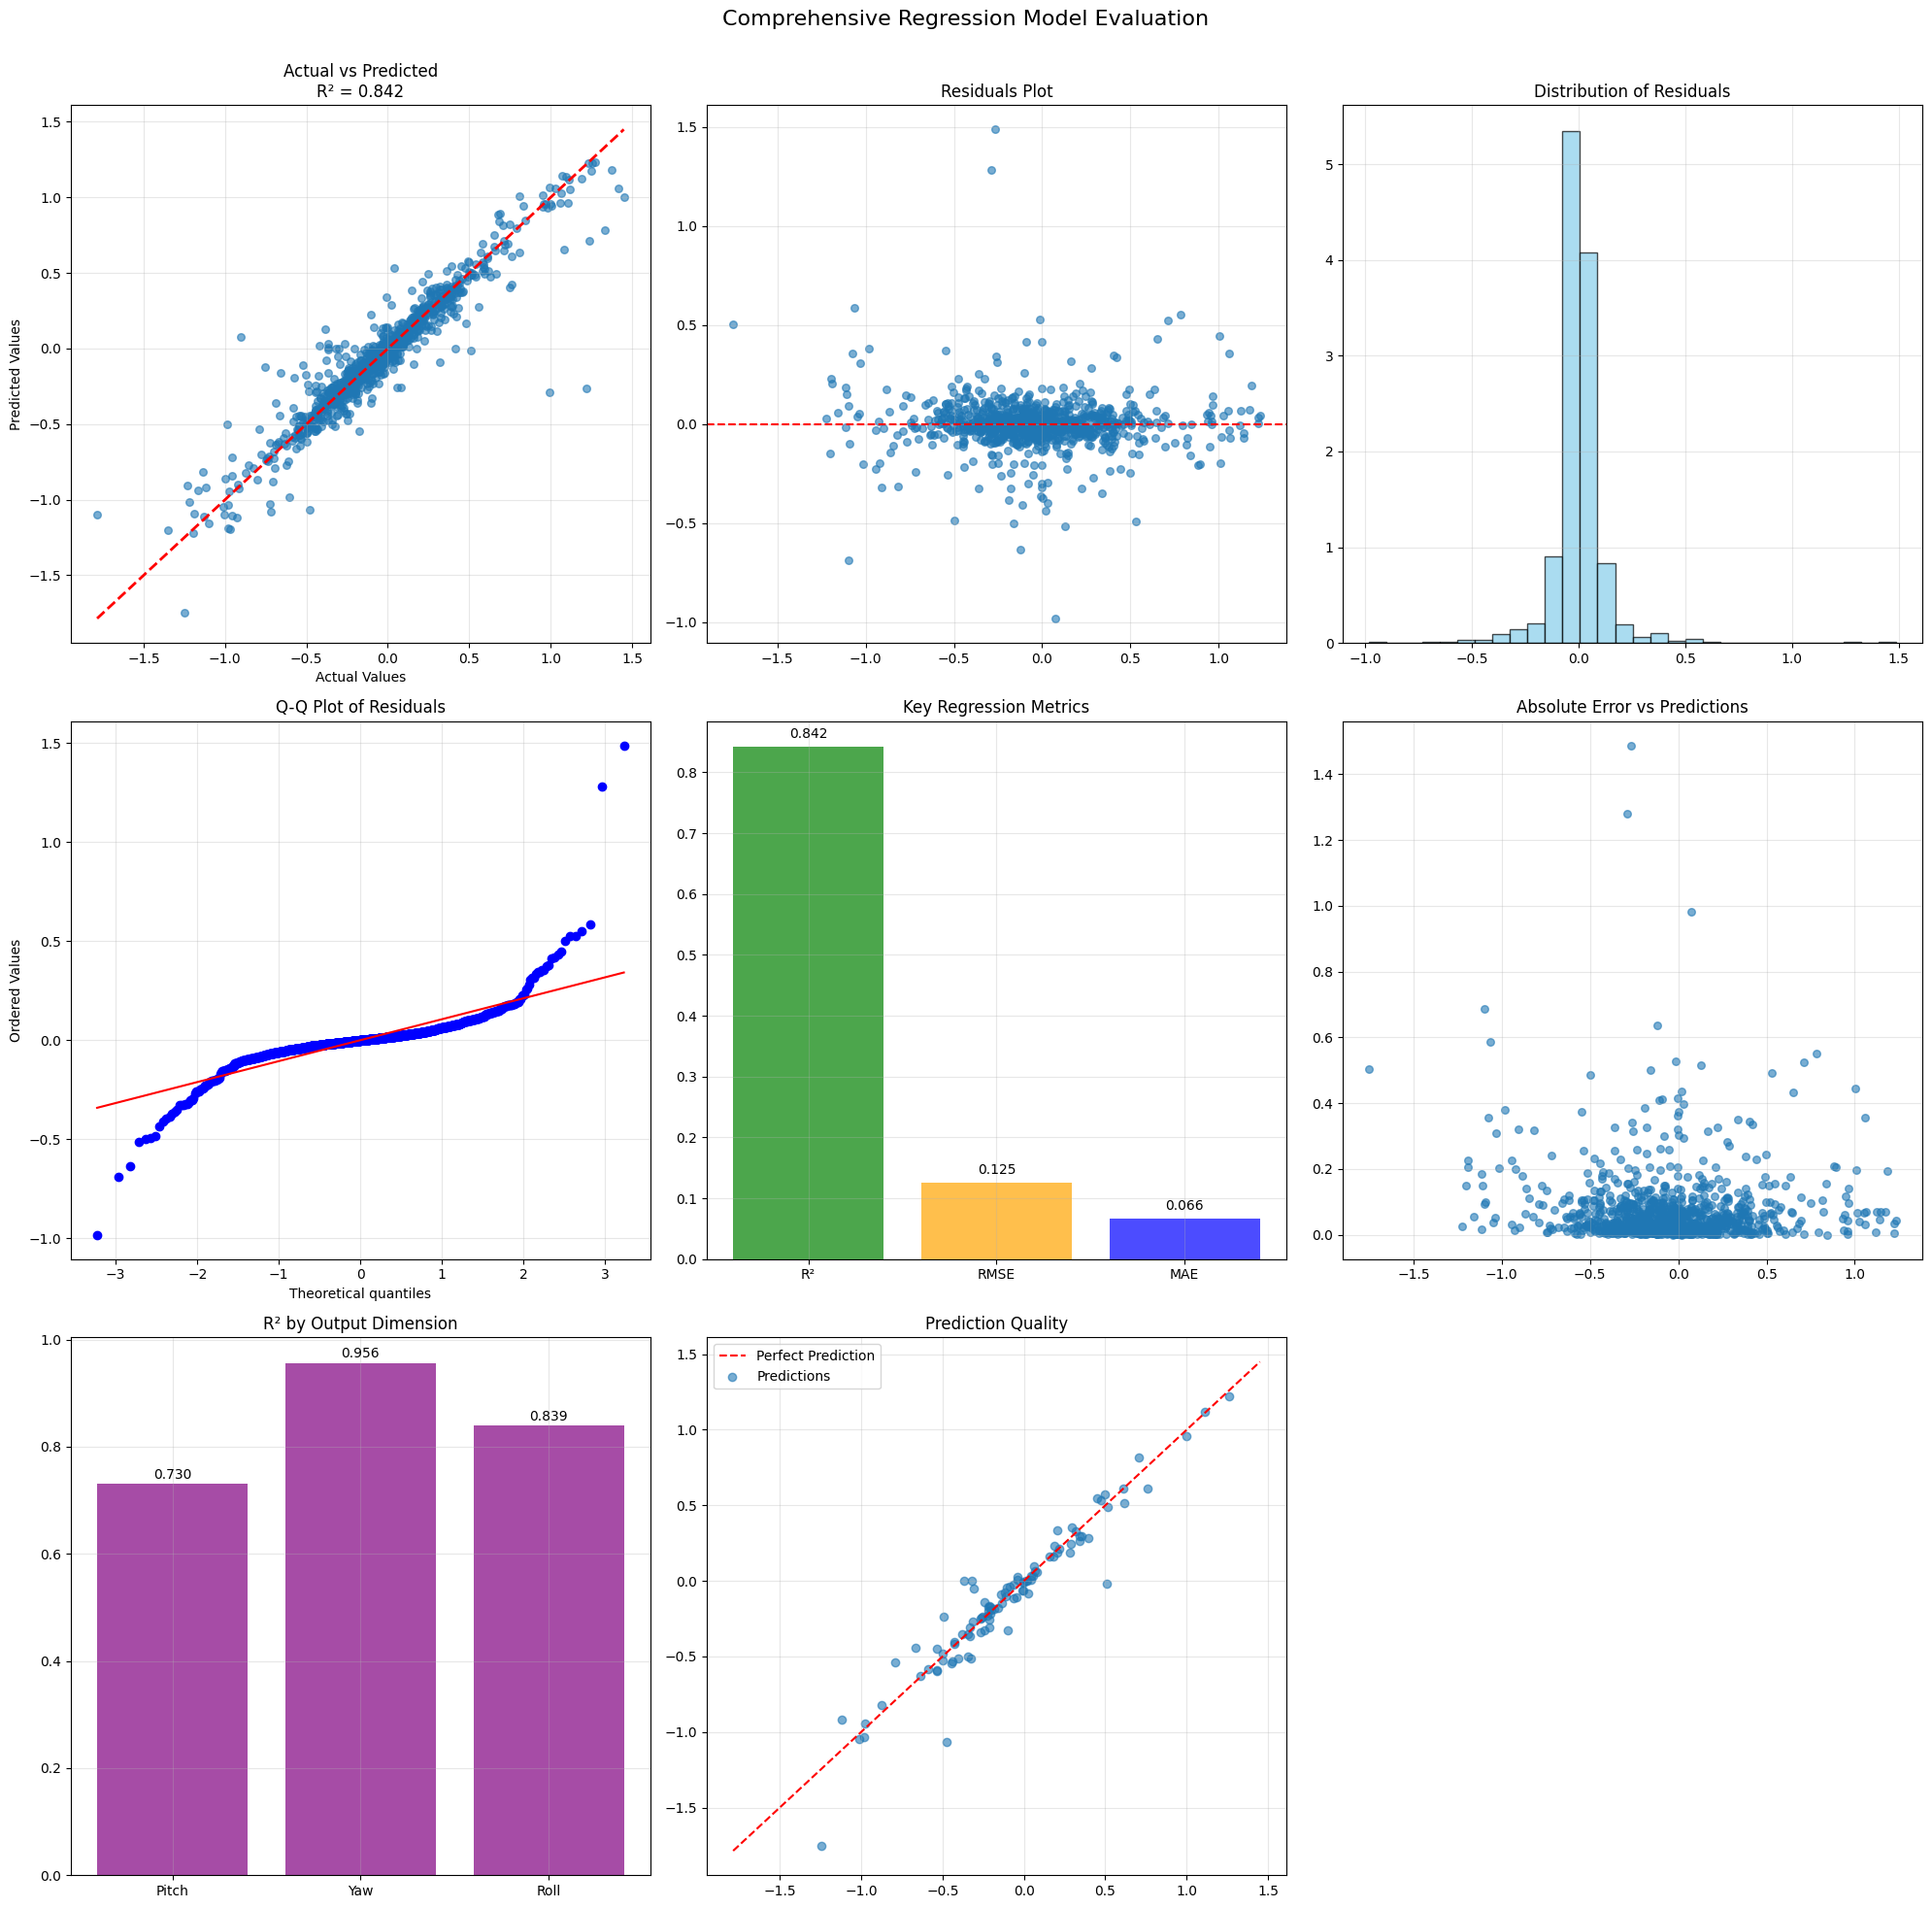

In [7]:
y_pred = best_model.predict(X_test)

metrics = calculate_regression_metrics(y_test, y_pred)
print("📊 Evaluation Metrics:")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")

plot_regression_results(y_test, y_pred, metrics, targets=["Pitch", "Yaw", "Roll"])

# 📌 6. Run Inference on New Image (Demo)

Predicted values:  -0.0642182287145755 0.5354191023453589 -0.25139407515513984


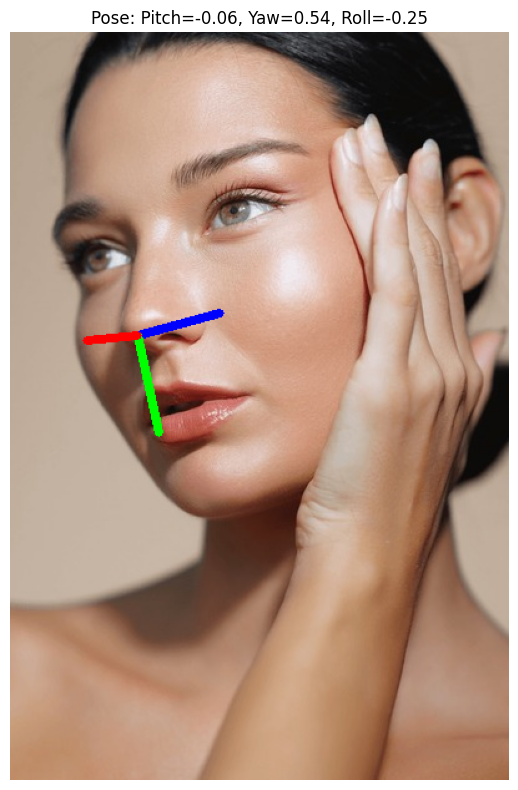

In [8]:
inference_on_image('./image.jpg')


# 📌 7. Run Inference on Webcam

In [9]:
start_webcam_pose_estimation()

Starting webcam face pose estimation...
Controls:
- Press 'q' or 'Q' to quit
- Press 's' or 'S' to save current frame
- Press 'h' or 'H' to toggle help display
- Press 'ESC' to quit
- Make sure the OpenCV window is focused (click on it)
- If keys don't work, click on the video window first
Key pressed: 113 ('q' if valid)
Quitting...
Webcam face pose estimation stopped.
